In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer
import warnings
from spellchecker import SpellChecker
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings('ignore')

In [3]:
import os
os.listdir()

['.ipynb_checkpoints',
 'amazon_reviews.txt',
 'count_vectorizer.ipynb',
 'TFIDF.ipynb']

In [4]:
amazon_review = pd.read_csv('amazon_reviews.txt',delimiter='\t',header=None, names=['review','sentiment'])
df = pd.read_csv('amazon_reviews.txt',delimiter='\t',header=None, names=['review','sentiment'])

In [5]:
df['sentiment'].value_counts()

0    500
1    500
Name: sentiment, dtype: int64

In [6]:
df['review'][3]

'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!'

In [7]:
# ----- convert(didn't,did not)
# t = "At eight o'clock on Thursday morning Arthur didn't feel 95very good.95French-Fries"  
# At eight o'clock on Thursday morning Arthur did not feel 95very good.95French-Fries

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [8]:
df['review'] = df['review'].apply(decontracted)

In [9]:
df['review'][3]

'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!'

In [10]:
#remove words and digits like noon65, or 6.
def rem_wor_dig(text):
    output = ''.join(c for c in text if not c.isdigit())
    return(output)

In [11]:
df['review'] = df['review'].apply(rem_wor_dig)

In [12]:
df['review'][3]

'Tied to charger for conversations lasting more than  minutes.MAJOR PROBLEMS!!'

In [13]:
# removing punchuation
def rem_punc(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    return " ".join(tokens)

In [14]:
df['review'] = df['review'].apply(rem_punc)

In [15]:
df['review'][3]

'Tied to charger for conversations lasting more than minutes MAJOR PROBLEMS'

In [16]:
df['review'] = df['review'].apply(str. lower)

In [17]:
#custom stopwords list
stopwords = ['from', "she's", 'theirs', 'be', 'won', 'shouldn', 'should', 'or', 'were', 'she', "shouldn't", 'until', 'himself', 'd', 'at', 'than', 'aren', "doesn't", 've', 'o', 'mustn', "you've", 'ours', 'wasn', 'but', 'once', 'there', "didn't", 'we', 'has', 'am', 'of', 'own', "you'd", 'in', 'he', "shan't", "mightn't", "don't", 'having', 'with', 'my', 'its', 'had', 'y', 'yourselves', 'didn', 'your', 'each', "haven't", 'yourself', 'and', 'is', 'nor', 'who', 'whom', 'couldn', 'this', 'mightn', 'shan', 'have', 'for', 'her', 'hers', 'other', 'during', 'herself', 'themselves', 'here', 'them', 's', 'hadn', "it's", 'so', "mustn't", 'did', 'about', 'after', "hadn't", 'haven', "you'll", 'can', 'just', 'isn', 'the', 'our', 'by', 'further', 'do', 'on', 're', 'doing', "aren't", 'off', 'some', 'an', 'only', 'over', 'me', 'while', 'will', 'too', 'i', 'under', 'more', "you're", 'their', 'you', 'as', 'ourselves', 'both', 'where', 'then', "hasn't", "weren't", "won't", 'before', 'are', "wouldn't", 'needn', 'because', 'doesn', 'into', 'that', 'between', "wasn't", 'it', 'him', 'up', 'above', 'his', 'these', 'm', 'been', "couldn't", 'to', 'those', 'same', 'don', 'out', 'ma', 'below', 'being', 'such', 'what', 'wouldn', "that'll", 'itself', 'hasn', "isn't", 'again', 'through', 'very', 'll', 'which', 'when', "should've", 'any', 't', 'how', 'all', "needn't", 'yours', 'weren', 'myself', 'a', 'they', 'if', 'ain', 'does', 'was', 'now', 'most', 'why']

In [18]:
# lemmantizing and removing stopwords from custom list
lemmatizer = WordNetLemmatizer()
def remove_stopwords(text):
    text_tokens = word_tokenize(text)
    tokens_without_sw = [lemmatizer.lemmatize(word) for word in text_tokens if not word in stopwords]
    return(tokens_without_sw)

In [19]:
df['review'] = df['review'].apply(remove_stopwords)

In [20]:
df['review'][3]

['tied', 'charger', 'conversation', 'lasting', 'minute', 'major', 'problem']

In [21]:
def join_word(text):
    s = ' '.join(word for word in text)
    return(s)

In [22]:
df['review'] = df['review'].apply(join_word)

In [23]:
df

,review,sentiment
0,no way plug u unless go converter,0
1,good case excellent value,1
2,great jawbone,1
3,tied charger conversation lasting minute major...,0
4,mic great,1
...,...,...
995,screen get smudged easily touch ear face,0
996,piece junk lose call phone,0
997,item not match picture,0
998,thing disappoint infra red port irda,0


# TFIDF_VECTORIZER

In [26]:
tf_vect = TfidfVectorizer()
tf_matrix = tf_vect.fit_transform(df['review'])
tf_array = tf_matrix.toarray()
X_tf_vect = pd.DataFrame(data=tf_array,columns = tf_vect.get_feature_names())
print (X_tf_vect.shape)

(1000, 1564)


In [27]:
y = df['sentiment']

In [28]:
from sklearn.model_selection import train_test_split
X_train_tf,X_test_tf,y_train_tf,y_test_tf=train_test_split(X_tf_vect,y,test_size=0.3,random_state=40,stratify=y)

In [30]:
print(X_train_tf.shape,X_test_tf.shape,y_train_tf.shape,y_test_tf.shape)

(700, 1564) (300, 1564) (700,) (300,)


### RANDOM FOREST

In [31]:
# Random Forest Classifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model_rf = RandomForestClassifier(random_state= 42)  

scoring = {"Recall": 'recall', "Accuracy": 'accuracy'}

cv = StratifiedKFold(n_splits= 10, shuffle=True, random_state=1)
parameter = {
             'n_estimators': [100,200],
             'max_depth' : [4,5,6,7],
             'criterion' :['gini', 'entropy'],
             'min_samples_leaf': [3, 4, 5],
             'min_samples_split': [8, 10, 12],
             'bootstrap': [True, False] # boot straping method is used to build the tree rather than using whole dataset

            }

result_rf = GridSearchCV(estimator = model_rf, 
                         param_grid = parameter, 
                         cv = cv, 
                         scoring= scoring,
                         refit="Recall", #refits with the parameter setting that has the best cross-validated score.
                         n_jobs = -1, #means using all processors
                         return_train_score =False # to get insights on how different parameter settings impact the overfitting/underfitting trade-off.
                        )

result_rf.fit(X_train_tf, y_train_tf)
print(result_rf.best_params_)
print(result_rf.best_score_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
0.6742857142857142


In [32]:
y_pred_rf = result_rf.predict(X_test_tf)

In [33]:
from sklearn.metrics import fbeta_score
fb_rf = fbeta_score(y_test_tf, y_pred_rf, beta=1)
fb_rf

0.7615384615384616

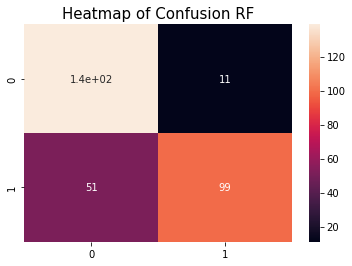

In [34]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test_tf, y_pred_rf)
plt.title('Heatmap of Confusion RF', fontsize = 15)
sns.heatmap(cm_rf, annot = True)
plt.show()

In [35]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[1][0])
    print('False negative = ', cm[0][1])
    print('True negative = ', cm[1][1])

In [36]:
print_confusion_matrix(y_test_tf, y_pred_rf)

True positive =  139
False positive =  51
False negative =  11
True negative =  99


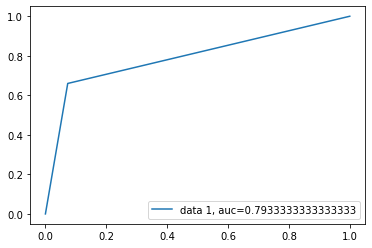

In [39]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, _ = roc_curve(y_test_tf, y_pred_rf)
auc = roc_auc_score(y_test_tf, y_pred_rf)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [41]:
y_pred_proba_rf = (result_rf.predict_proba(X_test_tf)[:,1] >= 0.5).astype(bool)


cm = confusion_matrix(y_test_tf, y_pred_rf)
print('True positive = ', cm[0][0])
print('False positive = ', cm[1][0])
print('False negative = ', cm[0][1])
print('True negative = ', cm[1][1])

True positive =  139
False positive =  51
False negative =  11
True negative =  99


### NAIVE BAYES

In [42]:
X_train_nb,X_test_nb,y_train_nb,y_test_nb=train_test_split(X_tf_vect,y,test_size=0.3,random_state=40,stratify=y)

In [43]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model_nb = GaussianNB()

# Train the model using the training sets
model_nb.fit(X_train_nb,y_train_nb)

GaussianNB()

In [45]:
y_pred_nb = model_nb.predict(X_test_tf)

In [1]:
fb_rf = fbeta_score(y_test_cv, y_pred_nb, beta=1)
fb_rf

In [49]:
print(print_confusion_matrix(y_test_tf, y_pred_nb))

cm_rf = confusion_matrix(y_test_cv, y_pred_nb)
plt.title('Heatmap of Confusion RF', fontsize = 15)
sns.heatmap(cm_rf, annot = True)
plt.show()

True positive =  93
False positive =  31
False negative =  57
True negative =  119
None


NameError: name 'y_test_cv' is not defined

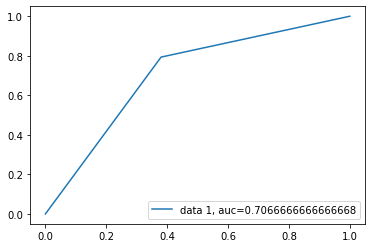

In [51]:
fpr, tpr, _ = roc_curve(y_test_tf, y_pred_nb)
auc = roc_auc_score(y_test_tf, y_pred_nb)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### SVC

In [52]:
from sklearn.svm import SVC
model_svm = SVC(random_state = 42)

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
result_svm = GridSearchCV(estimator = model_svm,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
result_svm.fit(X_train_tf, y_train_tf)

print(result_svm.best_params_)
print(result_svm.best_score_)

{'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}
0.7985714285714286


In [54]:
y_pred_svm = result_svm.predict(X_test_tf)

In [55]:
fb_rf = fbeta_score(y_test_tf, y_pred_svm, beta=1)
fb_rf

0.7984790874524714

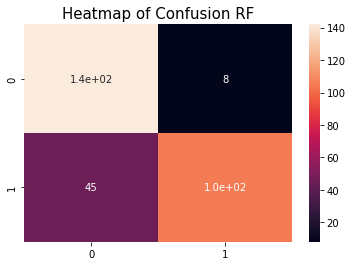

In [56]:
cm_rf = confusion_matrix(y_test_tf, y_pred_svm)
plt.title('Heatmap of Confusion RF', fontsize = 15)
sns.heatmap(cm_rf, annot = True)
plt.show()

In [57]:
print_confusion_matrix(y_test_tf, y_pred_svm)

True positive =  142
False positive =  45
False negative =  8
True negative =  105


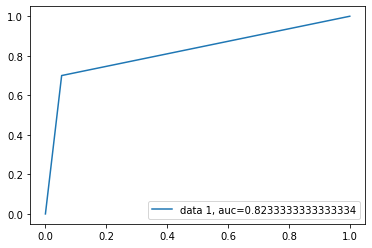

In [58]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, _ = roc_curve(y_test_tf, y_pred_svm)
auc = roc_auc_score(y_test_tf, y_pred_svm)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Decision tree classifier

In [59]:
# Necessary imports
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
  
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": [1,2,3,4,5,6],
              "min_samples_leaf": [1,2,3,4,5,6],
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
model_DT = DecisionTreeClassifier()
  
# Instantiating RandomizedSearchCV object
result_dt = GridSearchCV(model_DT, param_dist, cv = 5)
  
result_dt.fit(X_train_tf, y_train_tf)
  
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(result_dt.best_params_))
print("Best score is {}".format(result_dt.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1}
Best score is 0.6842857142857143


In [60]:
y_pred_dt = result_dt.predict(X_test_tf)

In [61]:
fb_rf = fbeta_score(y_test_tf, y_pred_dt, beta=1)
fb_rf

0.7030303030303031

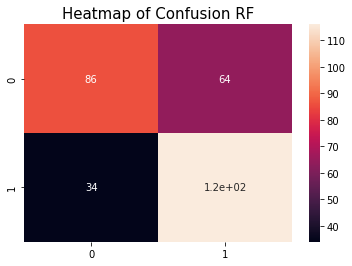

In [62]:
cm_rf = confusion_matrix(y_test_tf, y_pred_dt)
plt.title('Heatmap of Confusion RF', fontsize = 15)
sns.heatmap(cm_rf, annot = True)
plt.show()

In [63]:
print_confusion_matrix(y_test_tf, y_pred_dt)

True positive =  86
False positive =  34
False negative =  64
True negative =  116


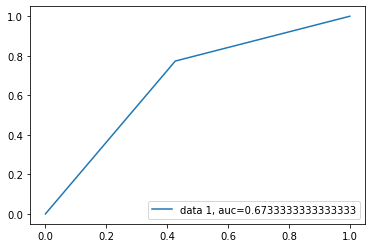

In [64]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, _ = roc_curve(y_test_tf, y_pred_dt)
auc = roc_auc_score(y_test_tf, y_pred_dt)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Logistic regression

In [65]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [66]:
cv = StratifiedKFold(n_splits= 10, shuffle=True, random_state=100)

paramgrid = {
    'penalty':['l1', 'l2', 'elasticnet'],        # l1 is Lasso, l2 is Ridge
    'solver':['newton-cg', 'lbfgs', 'liblinear'],
    'C': np.linspace(0.00002,1,100)
    }

result_lr = GridSearchCV(estimator=model_lr, param_grid=paramgrid, n_jobs=-1, cv=cv, scoring='accuracy')
result_lr.fit(X_train_tf, y_train_tf)

print ("Best Params", result_lr.best_params_)
print ("Best Score", result_lr.best_score_)

Best Params {'C': 0.8383870707070706, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score 0.8128571428571428


In [67]:
y_pred_lr = result_lr.predict(X_test_tf)

In [68]:
fb_rf = fbeta_score(y_test_tf, y_pred_lr, beta=1)
fb_rf

0.8086642599277978

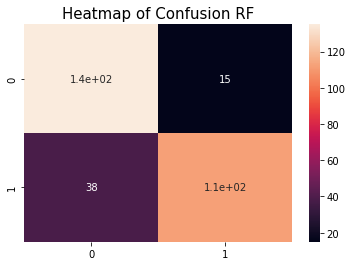

In [69]:
cm_rf = confusion_matrix(y_test_tf, y_pred_lr)
plt.title('Heatmap of Confusion RF', fontsize = 15)
sns.heatmap(cm_rf, annot = True)
plt.show()

In [70]:
print_confusion_matrix(y_test_tf, y_pred_lr)

True positive =  135
False positive =  38
False negative =  15
True negative =  112


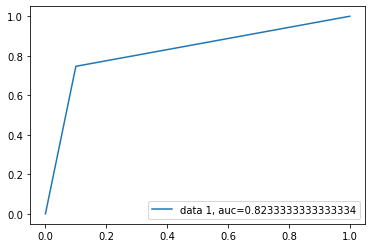

In [71]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, _ = roc_curve(y_test_tf, y_pred_lr)
auc = roc_auc_score(y_test_tf, y_pred_lr)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Results - Support Vector Machines and Logistic regression performed well in this case with 83% accuracy. This can be furthur improved using large dataset.